Enter the start date of your last menstrual cycle (YYYY-MM-DD), or 'done' to finish:  2024-03-02
Enter the length of your menstrual cycle in days:  4
Enter any symptoms experienced during this cycle (comma-separated):  bloating,cramps,headache
Enter the start date of your last menstrual cycle (YYYY-MM-DD), or 'done' to finish:  2023-12-01
Enter the length of your menstrual cycle in days:  3
Enter any symptoms experienced during this cycle (comma-separated):  bloating,cramps
Enter the start date of your last menstrual cycle (YYYY-MM-DD), or 'done' to finish:  2023-11-05
Enter the length of your menstrual cycle in days:  3
Enter any symptoms experienced during this cycle (comma-separated):  bloating,cramps,hunger
Enter the start date of your last menstrual cycle (YYYY-MM-DD), or 'done' to finish:  done


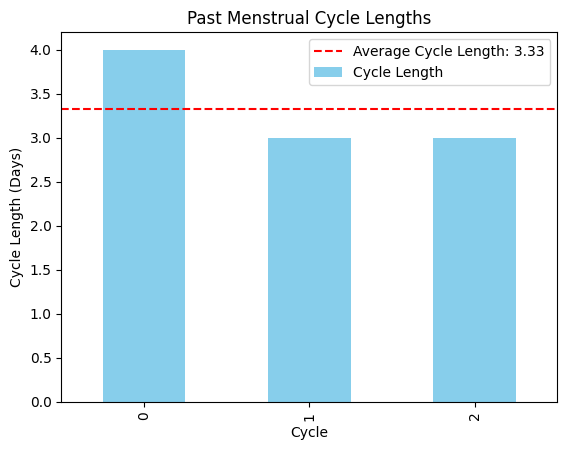



Past Menstrual Cycle Statistics:
Average Cycle Length: 3.3333333333333335
Standard Deviation of Cycle Length: 0.5773502691896258




Enter the start date of your current menstrual cycle (YYYY-MM-DD):  2024-03-02
Enter the length of your current menstrual cycle in days:  4


Predicted Menstrual Cycle Phases:
Ovulation Date: 2024-03-04
Fertile Window Start: 2024-02-28
Fertile Window End: 2024-03-08




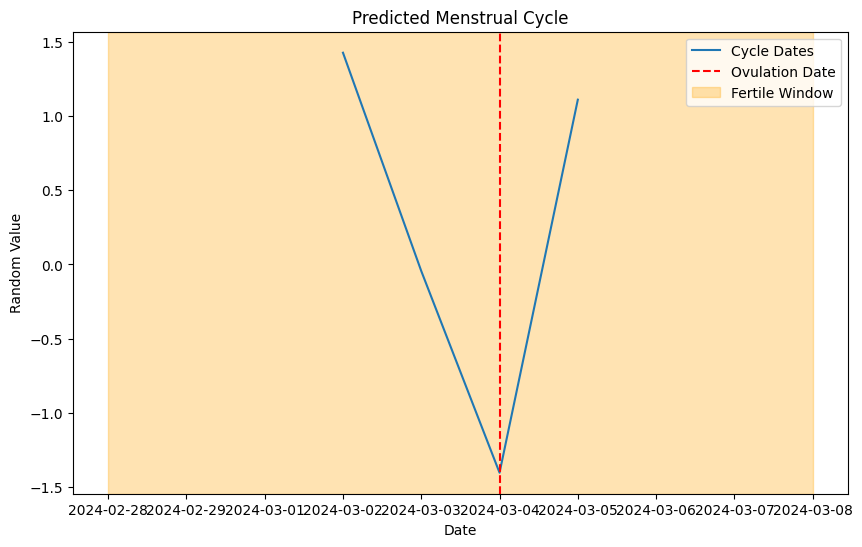

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


def predict_cycle(start_date, cycle_length):
    cycle_dates = pd.date_range(start_date, periods=cycle_length, freq='D')
    
    ovulation_day = int(cycle_length / 2)
    ovulation_date = cycle_dates[ovulation_day]
    
    fertile_window_start = ovulation_date - timedelta(days=5)
    fertile_window_end = ovulation_date + timedelta(days=4)
    
    return {
        'cycle_dates': cycle_dates,
        'ovulation_date': ovulation_date,
        'fertile_window_start': fertile_window_start,
        'fertile_window_end': fertile_window_end
    }


def display_predictions(predictions):
    print("Predicted Menstrual Cycle Phases:")
    print("=================================")
    print("Ovulation Date:", predictions['ovulation_date'].strftime('%Y-%m-%d'))
    print("Fertile Window Start:", predictions['fertile_window_start'].strftime('%Y-%m-%d'))
    print("Fertile Window End:", predictions['fertile_window_end'].strftime('%Y-%m-%d'))
    print("\n")

   
    plt.figure(figsize=(10, 6))
    plt.plot(predictions['cycle_dates'], np.random.randn(len(predictions['cycle_dates'])), label='Cycle Dates')
    plt.axvline(predictions['ovulation_date'], color='r', linestyle='--', label='Ovulation Date')
    plt.axvspan(predictions['fertile_window_start'], predictions['fertile_window_end'], color='orange', alpha=0.3, label='Fertile Window')
    plt.title("Predicted Menstrual Cycle")
    plt.xlabel("Date")
    plt.ylabel("Random Value")
    plt.legend()
    plt.show()


def analyze_past_cycles(cycle_data):
    cycle_data['Start Date'] = pd.to_datetime(cycle_data['Start Date'])
    cycle_data['Cycle Length'] = pd.to_numeric(cycle_data['Cycle Length'])
    
    avg_cycle_length = cycle_data['Cycle Length'].mean()
    std_cycle_length = cycle_data['Cycle Length'].std()
    cycle_data['Cycle Length'].plot(kind='bar', color='skyblue')
    plt.axhline(avg_cycle_length, color='r', linestyle='--', label=f'Average Cycle Length: {avg_cycle_length:.2f}')
    plt.title('Past Menstrual Cycle Lengths')
    plt.xlabel('Cycle')
    plt.ylabel('Cycle Length (Days)')
    plt.legend()
    plt.show()

    print("\n")
    print("Past Menstrual Cycle Statistics:")
    print("================================")
    print("Average Cycle Length:", avg_cycle_length)
    print("Standard Deviation of Cycle Length:", std_cycle_length)
    print("\n")


def main():
    past_cycles = []
    
    while True:
        start_date_str = input("Enter the start date of your last menstrual cycle (YYYY-MM-DD), or 'done' to finish: ")
        if start_date_str.lower() == 'done':
            break
        
        cycle_length = int(input("Enter the length of your menstrual cycle in days: "))
        
        past_cycles.append({'Start Date': start_date_str, 'Cycle Length': cycle_length})
        
        symptoms = input("Enter any symptoms experienced during this cycle (comma-separated): ")
        past_cycles[-1]['Symptoms'] = symptoms.split(',')
        
    past_cycle_data = pd.DataFrame(past_cycles)
    analyze_past_cycles(past_cycle_data)
    
    start_date_str = input("Enter the start date of your current menstrual cycle (YYYY-MM-DD): ")
    cycle_length = int(input("Enter the length of your current menstrual cycle in days: "))
    
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    
    predictions = predict_cycle(start_date, cycle_length)
    display_predictions(predictions)

if __name__ == "__main__":
    main()
